# Homework #5: Topic modeling solution

Instead of topic modeling newsgroup data, let's look at fiction and see what we can do with it.


In [1]:
import re
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### Load fiction data

We load a dataset of fiction that's in your repository.

In [2]:
ficpath = Path('../data/HWfiction/HWfiction.tsv')
fic = pd.read_csv(ficpath, sep = '\t')
fic.head()

,chunkid,decade,text
0,1880_Adams_1,1880,young and fresh from that hot-bed of abolition...
1,1880_Adams_1,1880,"we dine at half-past six."" Senator Ratcliffe h..."
2,1880_Adams_3,1880,"The story is this, Mrs. Lee; and it is well-kn..."
3,1880_Adams_4,1880,"tell you,"" said he drily, ""you will be wiser t..."
4,1880_Aldrich_1,1880,"suggested somebody. ""Three on 'em snaked in to..."


Each row contains an id, a date rounded off at the decade level, and the text of a chunk of fiction.

Let's also load a stopword list.

In [3]:
stoppath = Path('../data/HWfiction/HWfictionstopwords.txt')

stopwords = [x.strip() for x in open(stoppath, encoding = 'utf-8').readlines()]

len(stopwords)

6437

###  Assignment 1

Vectorize the fiction using the list of stopwords we just loaded, and other settings parallel to our lab.

    CountVectorizer(strip_accents = 'unicode',
                                stop_words = stopwords,
                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
                                lowercase = True,
                                max_df = 0.5, 
                                min_df = 10)

Then train an 20-topic model of the data, using ```random_state = 0```.

Explore the model using pyLDAvis. (This may not appear in your .pdf when you print, but that's okay.)

Then 

A) Create the doc-topics matrix and turn it into a Pandas data frame so you can associate "decade" with each document. Use groupby() and mean() to summarize this matrix so it has one row for each decade, and the row contains mean topic probabilities for that decade.

B) Choose a topic that's rising across time; there will probably be a topic that features body parts like "face," "eyes," "hand" that makes a good example, but you can choose something else if you like.

Create a line chart that shows the topic's average frequency in different decades; the rise should be visible.

C) Choose a topic that's falling across time; there will probably be one with words like "sir," "king," "years" that makes a good example, but if not, you can poke around and find something else. Again, create a line chart.

D) Offer a two- or three-sentence speculative hypothesis to explain either the rising topic or the falling one. (You don't have to do both.) I know you don't really have evidence for the hypothesis yet. The point is not to be right but simply to stretch your hypothesis-forming muscles. Think about how you might test the hypothesis if you needed to.

### Preparing the model

We vectorize the fiction and train a topic model.

In [38]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stopwords,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
docterms = vectorizer.fit_transform(fic.text)
print(docterms.shape)

(5055, 10601)


In [39]:
lda = LatentDirichletAllocation(n_components=20, random_state=0, max_iter = 15)
lda.fit(docterms)

LatentDirichletAllocation(max_iter=15, n_components=20, random_state=0)

In [40]:
pyLDAvis.sklearn.prepare(lda, docterms, vectorizer)

/Users/tunder/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.015527 -0.085899       1        1  22.220645
10    -0.040355 -0.209888       2        1  12.043266
16    -0.213635 -0.050869       3        1  11.621108
3     -0.109559  0.087777       4        1   7.838129
2     -0.097227 -0.056892       5        1   7.080390
14    -0.174080 -0.008599       6        1   5.686555
13     0.159598 -0.002915       7        1   5.507993
18     0.057449  0.071370       8        1   4.125913
7      0.102485 -0.013525       9        1   4.120193
11     0.118151 -0.021307      10        1   3.266091
8     -0.188057  0.068767      11        1   2.526140
15     0.135522  0.097925      12        1   2.261719
5      0.084320  0.019266      13        1   1.933673
9      0.047627 -0.083384      14        1   1.789909
1      0.003994  0.004287      15        1   1.720789
19     0.101158  0.115706      16        1   1.674137
0      0.128112 -0.081594      17        1   1.654573
17     0.001076 -0.032090      18        1   1.446869
6     -0.101981  0.123771      19        1   0.753892
12    -0.030127  0.058092      20        1   0.728017, topic_info=        Term         Freq        Total Category  logprob  loglift
5967     mrs  2049.000000  2049.000000  Default  30.0000  30.0000
7823    room  2394.000000  2394.000000  Default  29.0000  29.0000
2712  doctor   581.000000   581.000000  Default  28.0000  28.0000
2743    door  2094.000000  2094.000000  Default  27.0000  27.0000
3425  father  1735.000000  1735.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
5479    lord    15.712178   531.503518  Topic20  -6.0237   1.4013
7823    room    17.656368  2394.172183  Topic20  -5.9071   0.0129
7749   right    16.628782  2676.518952  Topic20  -5.9670  -0.1585
3338    eyes    15.616503  3089.758955  Topic20  -6.0298  -0.3649
6595  people    14.917848  1944.241959  Topic20  -6.0756   0.0525

[1577 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
4          2  0.325380     abe
4          4  0.032538     abe
4         11  0.195228     abe
4         12  0.455531     abe
8          1  0.270016    able
...      ...       ...     ...
10598     12  0.114078  zenith
10598     14  0.456312  zenith
10598     19  0.114078  zenith
10600     10  0.236065     zoo
10600     14  0.708195     zoo

[9213 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 11, 17, 4, 3, 15, 14, 19, 8, 12, 9, 16, 6, 10, 2, 20, 1, 18, 7, 13])

#### A) Creating the doctopics matrix and grouping by decade

In [55]:
doctopics = lda.transform(docterms)
doctopics.shape

(5055, 20)

In [56]:
doctopics = pd.DataFrame(doctopics)
doctopics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000286,0.000286,0.000286,0.000286,0.483245,0.064572,0.000286,0.000286,0.000286,0.000286,0.000286,0.000286,0.000286,0.229032,0.000286,0.000286,0.000286,0.142979,0.075887,0.000286
1,0.000296,0.000296,0.000296,0.000296,0.311032,0.462411,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.221527,0.000296,0.000296
2,0.039215,0.000303,0.000303,0.000303,0.000303,0.016800,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.159336,0.537914,0.000303,0.082825,0.000303,0.132395,0.027575,0.000303
3,0.000273,0.000273,0.000273,0.512568,0.299842,0.049497,0.000273,0.000273,0.093366,0.000273,0.000273,0.000273,0.000273,0.040629,0.000273,0.000273,0.000273,0.000273,0.000273,0.000273
4,0.000291,0.000291,0.000291,0.000291,0.136973,0.000291,0.000291,0.000291,0.120031,0.000291,0.090164,0.648182,0.000291,0.000291,0.000291,0.000291,0.000291,0.000291,0.000291,0.000291


In [57]:
doctopics_decade = doctopics.assign(decade = fic.decade)

In [58]:
bydecade = doctopics_decade.groupby('decade', as_index = False).mean()
print(bydecade.shape)
bydecade.head()

(11, 21)


,decade,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1880,0.045991,0.015199,0.032824,0.068966,0.341584,0.036496,0.005888,0.033835,0.017528,...,0.025172,0.045898,0.004560,0.088096,0.041615,0.026097,0.070084,0.009311,0.060465,0.014686
1,1890,0.037359,0.015638,0.043184,0.082229,0.284270,0.024299,0.008793,0.043035,0.019636,...,0.040949,0.030345,0.005207,0.070997,0.066706,0.031478,0.077447,0.011696,0.065763,0.021594
2,1900,0.028875,0.018314,0.041564,0.080157,0.287813,0.025467,0.009611,0.025781,0.022830,...,0.057547,0.032751,0.010774,0.070211,0.071841,0.021792,0.111256,0.010082,0.045592,0.013387
3,1910,0.023367,0.025597,0.049607,0.071640,0.280823,0.020013,0.007300,0.033358,0.018410,...,0.085925,0.034328,0.004712,0.054765,0.086329,0.019109,0.101775,0.012645,0.032826,0.016943
4,1920,0.004516,0.031740,0.088947,0.093029,0.224730,0.016658,0.010202,0.038329,0.028054,...,0.073608,0.064739,0.008792,0.056835,0.061368,0.029271,0.082622,0.008475,0.044324,0.017925


#### B) Graph a topic that's rising across time

There are many ways to find a rising topic. Trial and error is an okay solution. But a simple, systematic approach is to test correlation with a set of ascending integers. 

In [54]:
from scipy.stats import pearsonr

ascendlist = list(range(11))

for i in range(20):
    print("Index ", i, 'displayed as: ', i + 1, pearsonr(ascendlist, bydecade.loc[ : , i])) 
    # note that I print i + 1 because the topic display is
    # indexed at 1 rather than 0
    

Index  0 displayed as:  1 (-0.854696590742636, 0.0008030928626519351)
Index  1 displayed as:  2 (-0.3221845693615759, 0.33391540534447)
Index  2 displayed as:  3 (0.9160227879412881, 7.46596389603833e-05)
Index  3 displayed as:  4 (-0.028251326090867335, 0.9342862059516036)
Index  4 displayed as:  5 (-0.9425612489492919, 1.4051774224783319e-05)
Index  5 displayed as:  6 (-0.8431800247912707, 0.0011123565927711628)
Index  6 displayed as:  7 (-0.32049895919536453, 0.3365952586444414)
Index  7 displayed as:  8 (0.782422181596816, 0.00442186446683199)
Index  8 displayed as:  9 (0.7895935717140103, 0.0038454562671845047)
Index  9 displayed as:  10 (0.4193625256388443, 0.19917040062224145)
Index  10 displayed as:  11 (0.9672468779162678, 1.1629448180741735e-06)
Index  11 displayed as:  12 (-0.5229962040209135, 0.0987840000679239)
Index  12 displayed as:  13 (0.34581999785425077, 0.29754413389853807)
Index  13 displayed as:  14 (-0.8592873636700771, 0.000699903888601077)
Index  14 displayed a

Topics 3 and 11 are both rising strongly. Topics 5, 6 and 15 are declining strongly. 

<AxesSubplot:xlabel='decade'>

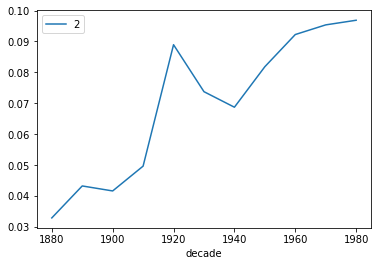

In [52]:
bydecade.plot(x = 'decade', y = 2)

#### C) Graph one falling across time.

<AxesSubplot:xlabel='decade'>

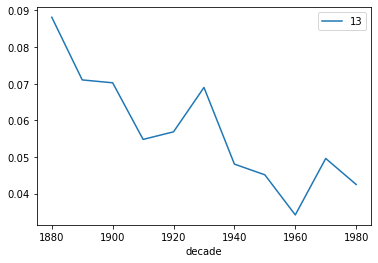

In [53]:
bydecade.plot(x = 'decade', y = 13)

#### D) Hypothesis.

Any hypothesis here is okay. I just wanted to get you thinking about ways one *might* interpret a topic model. If you guessed "references to the body might be increasing because the language of fiction is becoming more physical," or "references to aristocratic titles might be decreasing because aristocracy isn't a contemporary social reality," those are certainly plausible hypotheses to investigate, for instance.

## Assignment 2

Go back to the original document-topic matrix (before you grouped it by decade), and perform Principal Component analysis to compress it down to two dimensions. Select about 20% of the rows, which you can do by

    .sample(frac = .2)

and visualize them in the space created by PCA, colored by decade (if you use a continuous palette like 'viridis,' this may be easier to understand).

Would you say chronology is or isn't a pattern organizing this topic model?

In [59]:
pca = PCA(n_components = 2)
scaler = StandardScaler()
scaled_doctopics = scaler.fit_transform(doctopics)  # they will probably forget this
                                                    # that's okay
components = pca.fit_transform(scaled_doctopics)  
components.shape

(5055, 2)

In [61]:
components_df = pd.DataFrame(components, columns = ['x', 'y'])
components_df['decade'] = fic['decade']
components_df.head()

,x,y,decade
0,-1.636706,0.123923,1880
1,-0.861707,-0.365372,1880
2,-1.598171,0.775357,1880
3,0.563667,1.706595,1880
4,-0.857373,0.707606,1880


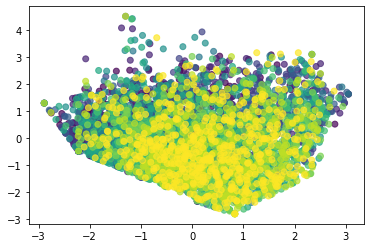

In [72]:
plt.scatter(data = components_df, x = 'x', y = 'y',
                   c = components_df['decade'], cmap = 'viridis', alpha = 0.7)

It looks like there's an association between decade and the y axis here.

In [70]:
pearsonr(components_df['y'], components_df['decade'])

(-0.2667876957483534, 4.046281010306762e-83)

And indeed there is an association with time. It's not surprising that the principal components have a chronological dimension, because many of the individual topics correlated very strongly with time, either positively or negatively. (The correlations are stronger and more common than we would expect by chance, even given twenty different topics.)